Data Source:

https://www.kaggle.com/datasets/carrie1/ecommerce-data

### Import main Libraries

In [1]:
# check which environment the notebook kernel belongs to
import sys
print(sys.executable)

C:\Users\phdip\anaconda3\envs\dsaec1\python.exe


In [2]:
# import all libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import chardet
%matplotlib inline  

In [3]:
# check all version used from libraries 
%reload_ext watermark
%watermark --iversions

pandas    : 2.3.2
sys       : 3.13.7 | packaged by Anaconda, Inc. | (main, Sep  9 2025, 19:54:37) [MSC v.1929 64 bit (AMD64)]
chardet   : 5.2.0
seaborn   : 0.13.2
matplotlib: 3.10.7
numpy     : 2.3.3



### Load and Explore the Data (Exploratory Data Analysis)

In [4]:
# detect the correct encoding --- DEPRECATED
with open("data.csv", "rb") as f:
    result = chardet.detect(f.read(100000))
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [5]:
# recommended over chardet nowadays
from charset_normalizer import from_path

result = from_path("data.csv").best()
print(result.encoding)

cp1250


In [6]:
# load data
df = pd.read_csv("data.csv", encoding="latin-1", parse_dates=["InvoiceDate"])

In [7]:
# verify data type
type(df)

pandas.core.frame.DataFrame

In [8]:
# visualize shape
df.shape

(541909, 8)

In [9]:
# visualize first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
# visualize last 5 rows
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [11]:
# visualize general iformation about: data tyes, non-null values, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
# statistics summary
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [13]:
# data types
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

### Cleaning, Pre-processing and Feature Engineering

In [14]:
# force the InvoiceDate column to be a datetime type
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [15]:
# create the revenue column
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

In [16]:
# create the delivery status column
df["Country"] = df["Country"].str.strip()
df["Delivery Status"] = df["Country"].apply(lambda country: "Fast" if country in ["United Kingdom", "Australia", "Canada"] else "Normal")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        541909 non-null  object        
 1   StockCode        541909 non-null  object        
 2   Description      540455 non-null  object        
 3   Quantity         541909 non-null  int64         
 4   InvoiceDate      541909 non-null  datetime64[ns]
 5   UnitPrice        541909 non-null  float64       
 6   CustomerID       406829 non-null  float64       
 7   Country          541909 non-null  object        
 8   Revenue          541909 non-null  float64       
 9   Delivery Status  541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 41.3+ MB


In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Delivery Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Fast
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Fast
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Fast
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Fast
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Fast


### Analysis 01: TOP 10 best selling products 

In [55]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Delivery Status,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Fast,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Fast,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Fast,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Fast,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Fast,2010-12


In [19]:
# clean and group by description and then sum the number of quantities
df["Description"] = df["Description"].str.strip()
top_10_bsp = df.groupby("Description")["Quantity"].sum().sort_values(ascending = False).head(10)

In [20]:
type(df.groupby("Description")["Quantity"])

pandas.core.groupby.generic.SeriesGroupBy

In [21]:
type(df.groupby("Description")["Quantity"].sum())

pandas.core.series.Series

In [22]:
type(top_10_bsp)

pandas.core.series.Series

In [23]:
top_10_bsp

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64

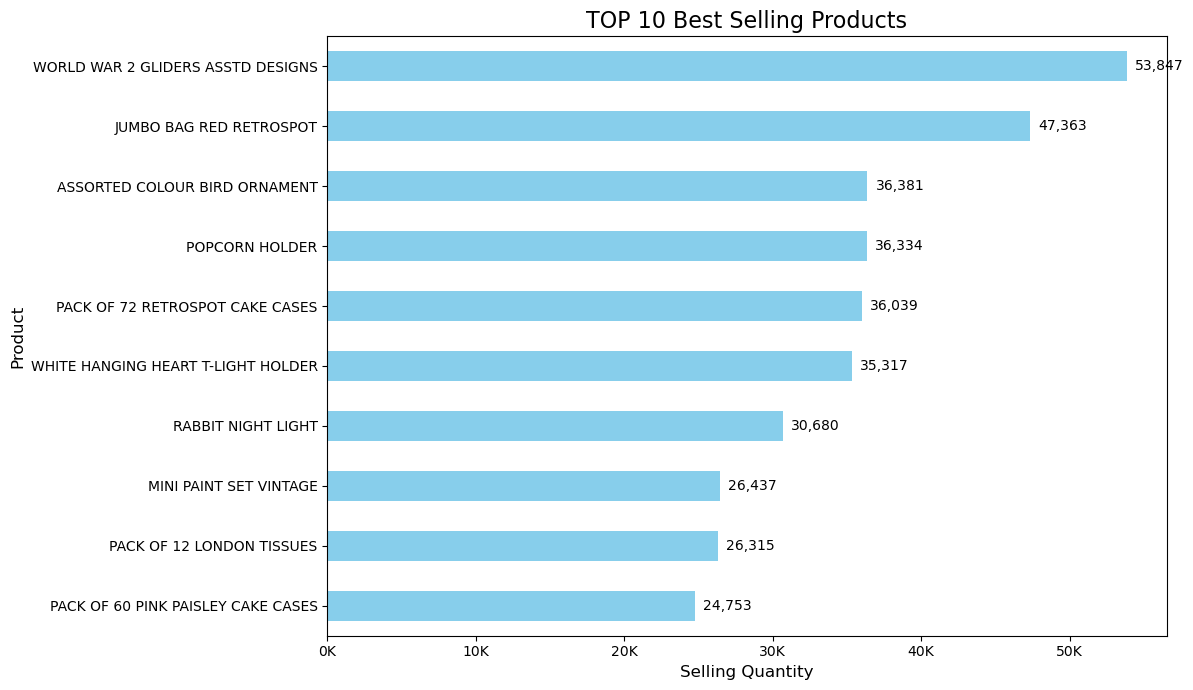

In [52]:
# Define a style for the chart
# sns.set_style("whitegrid")

# Create the chart and axis
plt.figure(figsize=(12, 7))
ax = top_10_bsp.sort_values(ascending=True).plot(kind='barh', color='skyblue')

# Add title and axis labels
plt.title('TOP 10 Best Selling Products', fontsize=16)
plt.xlabel('Selling Quantity', fontsize=12)
plt.ylabel('Product', fontsize=12)

# Create a function to format the numbers
# Converts 'x' into a string in the format 'R$ XX K'
def thousands_formatter(x, pos):
    """Format value in thousands (K) with R$ symbol."""
    return f'{x/1000:,.0f}K'

# Create the formatter object
formatter = FuncFormatter(thousands_formatter)

# Apply the formatter to the Y-axis
ax.xaxis.set_major_formatter(formatter)

# Add data labels at the end of each bar
for i, v in enumerate(top_10_bsp.sort_values(ascending=True)):
    ax.text(v + max(top_10_bsp) * 0.01,   # a bit to the right of the bar
            i,                            # same vertical position as the bar
            f'{v:,.0f}',                  # formatted number (no decimals)
            va='center',                  # vertical alignment
            fontsize=10)

# Adjust layout and show chart
plt.tight_layout()
plt.show()


### Analysis 02 - Monthly Revenue

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Delivery Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Fast
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Fast
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Fast
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Fast
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Fast


In [26]:
# create a monthly column
df['Month'] = df['InvoiceDate'].dt.to_period('M')

In [27]:
type(df['InvoiceDate'])

pandas.core.series.Series

In [28]:
type(df['InvoiceDate'].dt)

pandas.core.indexes.accessors.DatetimeProperties

In [29]:
type(df['InvoiceDate'].dt.to_period('M'))

pandas.core.series.Series

In [30]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Delivery Status,Month
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,Normal,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,Normal,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Normal,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Normal,2011-12
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,Normal,2011-12


In [31]:
# calculate monthly revenue
monthly_revenue = df.groupby("Month")["Revenue"].sum()

In [32]:
type(monthly_revenue)

pandas.core.series.Series

In [33]:
# convert index to string (because of line plot)
# monthly_revenue.index = monthly_revenue.index.strftime('%Y-%m')

In [54]:
# round to decimal places
monthly_revenue.map('R$ {:,.2f}'.format)

Month
2010-12      R$ 748,957.02
2011-01      R$ 560,000.26
2011-02      R$ 498,062.65
2011-03      R$ 683,267.08
2011-04      R$ 493,207.12
2011-05      R$ 723,333.51
2011-06      R$ 691,123.12
2011-07      R$ 681,300.11
2011-08      R$ 682,680.51
2011-09    R$ 1,019,687.62
2011-10    R$ 1,070,704.67
2011-11    R$ 1,461,756.25
2011-12      R$ 433,668.01
Freq: M, Name: Revenue, dtype: object

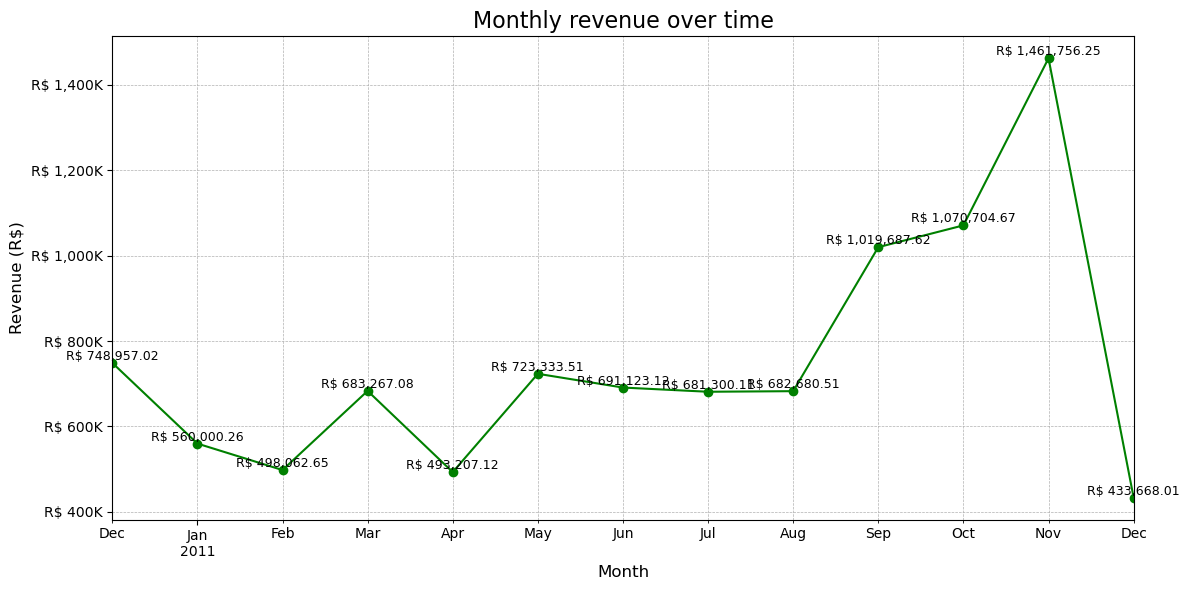

In [53]:
# Define the size of the chart
plt.figure(figsize = (12, 6))

# Define the kind of plot: line plot
ax = monthly_revenue.plot(kind = 'line', marker = 'o', linestyle = '-', color = 'green')

# Add data labels to each point
for x, y in zip(monthly_revenue.index, monthly_revenue.values):
    plt.text(x, y, f'R$ {y:,.2f}', ha='center', va='bottom', fontsize=9)

# Define the title
plt.title('Monthly revenue over time', fontsize = 16)

# Define X-axis
plt.xlabel('Month', fontsize = 12)

# Define Y-axis
plt.ylabel('Revenue (R$)', fontsize = 12)

# Rotate the X-axis values by 45 degrees for better visualization.
# plt.xticks(rotation = 45)

# Add a grid with a dashed style and thin lines
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

# Create a function to format the numbers
# Converts 'y' into a string in the format 'R$ XX K'
def thousands_formatter(y, pos):
    """Format value in thousands (K) with R$ symbol."""
    return f'R$ {y/1000:,.0f}K'

# Create the formatter object
formatter = FuncFormatter(thousands_formatter)

# Apply the formatter to the Y-axis
ax.yaxis.set_major_formatter(formatter)

# Automatically adjust elements to avoid overlap.
plt.tight_layout()

# Show line plot
plt.show()

### Analysis 03: Total Revenue by Country

In [36]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Delivery Status,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Fast,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Fast,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Fast,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Fast,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Fast,2010-12


In [37]:
# calculate Total revenue by Country
country_revenue = df.groupby("Country")["Revenue"].sum().sort_values(ascending = False)
country_revenue_filtered = country_revenue[country_revenue <= 500000]

In [38]:
country_revenue_filtered.map('R$ {:,.2f}'.format)

Country
Netherlands             R$ 284,661.54
EIRE                    R$ 263,276.82
Germany                 R$ 221,698.21
France                  R$ 197,403.90
Australia               R$ 137,077.27
Switzerland              R$ 56,385.35
Spain                    R$ 54,774.58
Belgium                  R$ 40,910.96
Sweden                   R$ 36,595.91
Japan                    R$ 35,340.62
Norway                   R$ 35,163.46
Portugal                 R$ 29,367.02
Finland                  R$ 22,326.74
Channel Islands          R$ 20,086.29
Denmark                  R$ 18,768.14
Italy                    R$ 16,890.51
Cyprus                   R$ 12,946.29
Austria                  R$ 10,154.32
Hong Kong                R$ 10,117.04
Singapore                 R$ 9,120.39
Israel                    R$ 7,907.82
Poland                    R$ 7,213.14
Unspecified               R$ 4,749.79
Greece                    R$ 4,710.52
Iceland                   R$ 4,310.00
Canada                    R$ 3,666.38
Malt

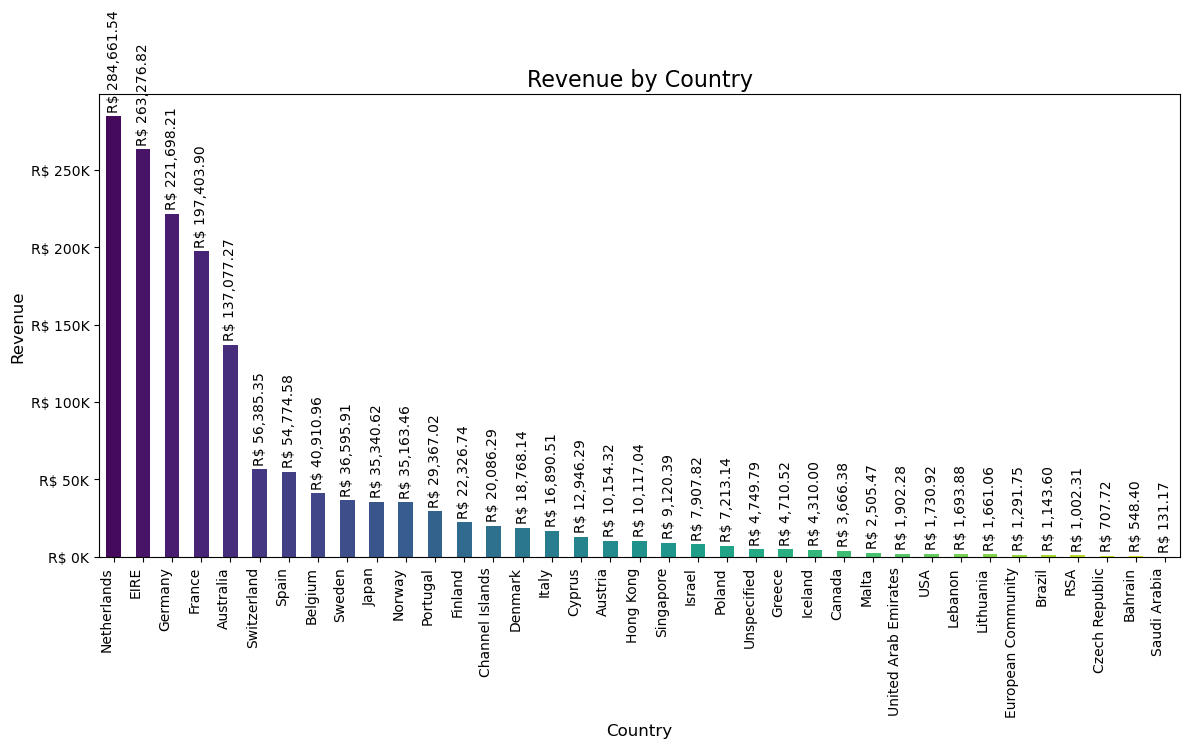

In [49]:
# Import the FuncFormatter function to format the axes
from matplotlib.ticker import FuncFormatter

# Sort the data to make the chart easier to read
country_revenue_filtered_ordered = country_revenue_filtered.sort_values(ascending=False)

# Create the Figure and Axes (ax) with plt.subplots()
# This gives us more control over chart elements
fig, ax = plt.subplots(figsize=(12, 7))

# Create a function to format the numbers
# Converts 'y' into a string in the format 'R$ XX K'
def thousands_formatter(y, pos):
    """Format value in thousands (K) with R$ symbol."""
    return f'R$ {y/1000:,.0f}K'

# Create the formatter object
formatter = FuncFormatter(thousands_formatter)

# Apply the formatter to the Y-axis
ax.yaxis.set_major_formatter(formatter)

# Plot the data using the 'ax' object
country_revenue_filtered_ordered.plot(kind='bar', ax=ax, color=sns.color_palette("viridis", len(country_revenue_filtered_ordered)))

# Add titles and labels using 'ax.set_...'
ax.set_title('Revenue by Country', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Revenue', fontsize=12)

# Adjust rotation of X-axis labels
plt.xticks(rotation=90, ha='right')

# Ensure proper layout
plt.tight_layout()

# Add data labels above each bar with 90° rotation
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        x=bar.get_x() + bar.get_width()/2,  # center of the bar
        y=height + max(country_revenue_filtered_ordered)*0.01,  # slightly above the bar
        s=f'R$ {height:,.2f}',  # format R$ 123,456.78
        ha='center',
        va='bottom',
        rotation=90,  # vertical rotation
        fontsize=10
    )

# Show the chart
plt.show()
